# CS 316/365: Introduction to Deep Learning
# Lab Exam - Fall 2024
# Dr. Abdul Samad
Total Duration: 2 Hours and 40 minutes <br/>
Total Points: 100 <br/>




# Instructions
1. Only VS Code or Anaconda Navigator are allowed for this exam. No other tools are permissible
2. You are not permitted to utilise the internet or any other source for this exam.
3. Any violation shall be treated as a plagarism case.
4. The error in one task will not carry to other tasks i.e. if your task x+1 is correct and task x is incorrect then you will get full points for task x+1 even though error will be there in task x+1 due to x.
5. The marks for each task are stated explicitly.
6. Please carefully study the questions; they are self-explanatory.
7. Rename your file as `Lab_Exam_aa01234.ipynb` where `aa01234` will be replaced by your student id.
8. Every task has testing code given below it.
9. You need to complete the code where #TODO is written
10. You can run python help function to `(example: help(np.arange))` to get info about the function and input parameters.

# Exam Overview

In this Exam, we are implementing a neural network with 3-hidden layers and we will be using it to classify digits. Since each image is a greyscale image of size 8 x 8 it is flattened into a column vector of size 64 before being fed to the multi-layer pereceptron.

<center>
<img src='https://i.postimg.cc/5yd2GbRZ/img.png' alt="drawing" width="800" height="400" />
<center/>


First 3 layers will have ReLU as their activation function and last hidden layer will have sigmoid. Please note that number of neurons and input features both are different.

The neural network is defined as follows:
$$ \mathbf{y}_1 = \mathbf{x}\mathbf{W}_1  + \mathbf{b}_1 \tag{1.1} $$
$$ \mathbf{h}_1 = ReLU(\mathbf{y_1}) \tag{1.2}$$
$$ \mathbf{y}_2 =  \mathbf{h_1}\mathbf{W}_2 + \mathbf{b}_2 \tag{1.3}$$
$$ \mathbf{h}_2 = ReLU(\mathbf{y_2}) \tag{1.4}$$
$$ \mathbf{y}_3 =  \mathbf{h_2}\mathbf{W}_3 + \mathbf{b}_3 \tag{1.5}$$
$$ \mathbf{h}_{3} = \sigma(\mathbf{y_3}) \tag{1.6}$$
$$ \mathbf{y}_4 = \mathbf{h_3}\mathbf{W}_4 + \mathbf{b}_4  \tag{1.7}$$
$$ \mathbf{\hat{y}} = Softmax(\mathbf{y}_4) \tag{1.8}$$
$$ L = -\frac{1}{n}\sum_{j=1}^{n} \mathbf{y}^{(i)} \log(\mathbf{\hat{y}^{(i)}}) \tag{1.9}$$




## Setup

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn import datasets
import sklearn.model_selection
from IPython.display import clear_output

# Dataset Overview

The dataset is of grayscale images which have then been flattened into a column vector of size 64. Dataset has already been loaded and plotted for you. You don't need to worry about loading it.


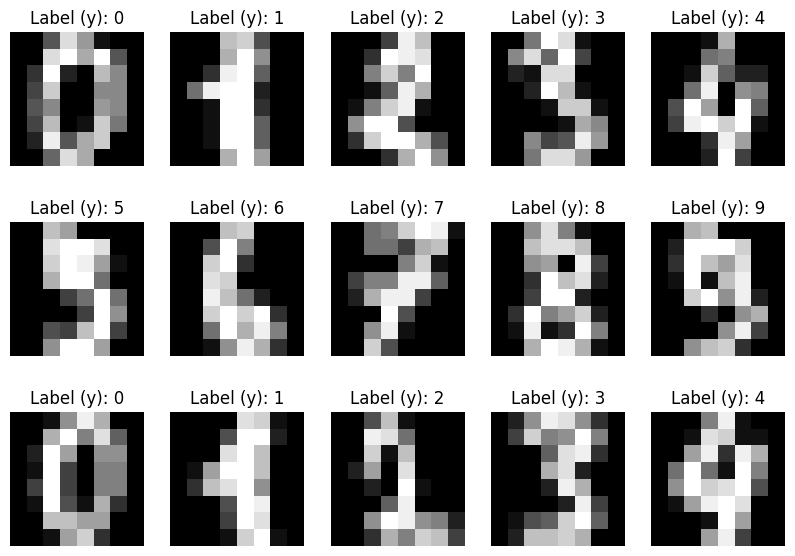

In [30]:
data = datasets.load_digits()
X = data["data"]
Y = data["target"]

fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape((8,8)), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=Y[i]))
    plt.axis('off')

# [10 Points] Task 01 - Train Test Split

In Task 01, you are required to the implement the function `train_test_split` which splits the datasets into train and test set.

**Hint: Use `rng.shuffle` to shuffle the dataset. Furthermore, instead of shuffling the dataset, shuffle the indexes.**

Complete function **train_test_split** given below.

In [31]:
#TODO: Implement the function train_test_split
def train_test_split(inputs,outputs,test_size,seed = 0):
    """
    Splits the data into training and test sets.
    Return 4 numpy arrays. X_train, X_test, Y_train, Y_test
    where training data is test_size proportion of data provided.

    Args:
        inputs [np.array] : numpy array of input data
        outputs [np.array]: numpy array of output labels
        test_size [float]: proportion of data to be used as test data. e.g. 0.2 means 20% of data is used for test data.
        seed [int]: A seed to create random number generator. (For reproducability) 
    """
   
    rng = np.random.default_rng(seed)
    assert(len(inputs) == len(outputs))
    assert(test_size <= 1.0)
    assert(test_size >= 0.0)
    num_samples = len(inputs)
    num_train = int(num_samples * (1.0 - test_size))
    # Write your code here
    indices = np.arange(inputs.shape[0])
    rng.shuffle(indices)
    X_shuffled = inputs[indices]
    Y_shuffled = outputs[indices]
    X_train, X_test = X_shuffled[:num_train], X_shuffled[num_train:]
    Y_train, Y_test = Y_shuffled[:num_train], Y_shuffled[num_train:]
    
    
    return X_train,X_test,Y_train,Y_test

In [32]:
# DO NOT EDIT
# Test Case to check Train Test Split
np.random.seed(1)
x = np.random.randn(15,2)
y = np.random.randn(15)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
assert np.allclose (X_train,np.array([[ 0.86540763, -2.3015387 ],[ 0.90159072,  0.50249434],[ 1.74481176, -0.7612069 ],[-1.10061918,  1.14472371],[ 1.62434536, -0.61175641],[ 0.3190391 , -0.24937038],[ 1.13376944, -1.09989127],[ 1.46210794, -2.06014071],[-0.26788808,  0.53035547],[ 0.90085595, -0.68372786],[-0.3224172 , -0.38405435],[ 0.04221375,  0.58281521]]))
assert np.allclose (X_test,np.array([[-0.12289023, -0.93576943],[-0.17242821, -0.87785842],[-0.52817175, -1.07296862]]))
assert np.allclose (Y_train,np.array([-0.6871727 , -0.88762896, -0.84520564, -0.19183555, -0.69166075,-0.67124613,  0.2344157 , -0.0126646 ,  0.05080775, -0.74715829,-1.11731035,  0.74204416]))
assert np.allclose (Y_test, np.array([ 1.6924546 ,  1.65980218, -0.39675353]))


(12, 2) (3, 2) (12,) (3,)


# [20 Points] Task 02 -  Activation Functions

In this task, you will be implementing the Sigmoid and ReLU activation fuctions.

## [10 Points]  Part A - Relu Activation Function

The Relu activation function and its dervivative are defined as  follows:
$$ f(z) = \max(z,0) \tag{2.1} $$
$$ f^{\prime}(z) = \begin{cases}1 & z > 0 \\0 & z < 0 \\
\end{cases}
\tag{2.2}
$$

Complete the functions **activation** which is for ReLU and **prime** which is for derivative of ReLU given below in class Relu

In [33]:
#TODO: Implement the Relu class which implements the Relu activation function.
class Relu:
   """
   Implements the Relu activation
   """
   @staticmethod
   def activation(z):
      # Write your code here
      # Hint: Use np.maximum
      # Refer to equation (2.1)
      return np.maximum(0,z)
      pass
      
   @staticmethod
   def prime(z):
      # Write your code here
      # Hint: Use np.where
      # Refer to equation (2.2)
      return np.where(z>0, 1, 0)
      pass
     

In [34]:
# DO NOT EDIT
# Test Case to Check ReLU
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Relu.activation(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[0.30471708,0.,0.7504512 ],[0.94056472,0.,0.],[0.1278404, 0.,0.]]))
grad = Relu.prime(input)
print(f"Gradient: {grad}")
assert np.allclose(grad,np.array([[1,0,1],[1,0,0],[1,0,0]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.30471708 0.         0.7504512 ]
 [0.94056472 0.         0.        ]
 [0.1278404  0.         0.        ]]
Gradient: [[1 0 1]
 [1 0 0]
 [1 0 0]]


## [10 Points] Part B - Sigmoid Activation Function

The sigmoid activation function and its derivative are defined as follows:
$$ \sigma (z) = \frac{1}{1+\exp{(-z)}} \tag{3.1} $$

$$ \sigma^{\prime} (z) = \sigma(z) \times (1 - \sigma(z)) \tag{3.2} $$

Complete the functions **activation** which is for sigmoid and **prime** which is for derivative of sigmoid given below in class sigmoid

In [35]:
#TODO: Implement the Sigmoid class which implements the Sigmoid activation function.
class Sigmoid:
    @staticmethod
    def activation(z):
      # Write your code here
      # Refer to equation (3.1)
      return 1/(1+np.exp(-z))
      pass
      
    @staticmethod
    def prime(z):
      # Write your code here
      # Refer to equation (3.2)
      exp = 1/(1+np.exp(-z))
      return exp*(1-exp)
      pass
      
      

In [36]:
# DO NOT EDIT
# Test Case to Check Sigmoid
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Sigmoid.activation(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[0.57559524, 0.26115306, 0.679277 ],[0.71921371, 0.12444053, 0.21379844],[0.53191664, 0.42159173, 0.49579981]]))
grad = Sigmoid.prime(input)
print(f"Gradient: {grad}")
assert np.allclose(grad, np.array([[0.24428536, 0.19295214, 0.21785976],[0.20194535, 0.10895508, 0.16808867],[0.24898133, 0.24385214, 0.24998236]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.57559524 0.26115306 0.679277  ]
 [0.71921371 0.12444053 0.21379844]
 [0.53191664 0.42159173 0.49579981]]
Gradient: [[0.24428536 0.19295214 0.21785976]
 [0.20194535 0.10895508 0.16808867]
 [0.24898133 0.24385214 0.24998236]]


# [5 Points ] Task 03 - Softmax

In this task you are required to implement a **numerically stable** version of the Softmax activation.

The Softmax function is defined as follows:
$$ S(y_i) = \frac{\exp{(y_i)}}{\sum_{j=1} \exp{(y_j)} } \tag {4.1} $$

**Hint: In order to implement a numerically stable version of the Softmax activation function, subtract the max of each row from each element in the row**

# Update: give an example

Complete function **activation** for Softmax activation

In [ ]:
class Softmax:
    @staticmethod
    def activation(z):
      # Write your code here
      # Refer to equation (4.1)
      return np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
      # Alternatively, this will also work
      
      """max_z = np.max(z, axis=1, keepdims=True)
      z = z-max_z
      s = np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
      return s
      """


In [38]:
# DO NOT EDIT
# Test Case to check Softmax activation function
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Softmax.activation(input)
print(f"Output: {output}")
assert np.allclose(output, np.array([[0.35432675, 0.09234378, 0.55332948],[0.86084143, 0.04776582, 0.09139274],[0.39892377, 0.25587457, 0.34520167]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.35432675 0.09234378 0.55332948]
 [0.86084143 0.04776582 0.09139274]
 [0.39892377 0.25587457 0.34520167]]


# [10 Points] Task 04 - Cross Entropy Loss

In this task, you are required to implement the Cross Entropy Loss function as well compute the derivative of the Cross Entropy Loss function with respect to the Softmax activation function.

The cross entropy loss function is defined as follows:
$$ L = -\frac{1}{m} \sum_{i=1}^{n} \mathbf{y}^{(i)}  \log(\mathbf{\hat{y}^{(i)}}) \tag {5.1}$$

The derivative of the Softmax activation function is defined as
$$ \frac{\delta L}{\delta x} =  \hat{y} -  y \tag {5.2}$$


where $\mathbf{y}^{(i)}$ is the one hot encoded label vector (represented by variable y_hot) and $\mathbf{\hat{y}}^{(i)}$ are the Softmax probabilities (represented by variable y_hat).


Complete functions delta for derivative of Loss function and loss for Loss function







In [39]:

#TODO: Implement the class CrossEntropy which represents the cross-entropy loss function.
class CrossEntropy:
    """
    Used with Softmax activation in final layer
    """
    @staticmethod
    def activation(z):
        # DO NOT EDIT
        return Softmax.activation(z)

    @staticmethod
    def delta(y_true, y):
        n,c = y.shape
        y_hot = np.eye(c)[y_true]
        y_hat = Softmax.activation(y)
        # Write your code here
        # Refer to equation (5.2)
        grad = y_hat - y_hot
        return grad

    @staticmethod
    def loss(y_true, y):
        m,c = y.shape
        y_hot = np.eye(c)[y_true]
        y_hat = Softmax.activation(y)
        # Write your code here
        # Refer to equation (5.1)
        loss = -(np.sum(y_hot*np.log(y_hat)))/m
        return loss

In [40]:
# DO NOT EDIT
# Test Case to check Softmax activation function
rng = np.random.default_rng(42)
y_hat = rng.normal(size=(3,3))
print(f"y_hat: {y_hat}")
y = np.arange(3)
print(f'y: {y}')
loss = CrossEntropy.loss(y,y_hat)
print(f"Cross Entropy Loss: {loss}")
assert round(loss,6) == 1.714202
delta = CrossEntropy.delta(y,y_hat)
print(f"Delta: {delta}")
assert np.allclose(delta, np.array([[-0.64567325,  0.09234378, 0.55332948],[ 0.86084143, -0.95223418 , 0.09139274],[ 0.39892377 , 0.25587457 ,-0.65479833]]))


y_hat: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
y: [0 1 2]
Cross Entropy Loss: 1.714202378772346
Delta: [[-0.64567325  0.09234378  0.55332948]
 [ 0.86084143 -0.95223418  0.09139274]
 [ 0.39892377  0.25587457 -0.65479833]]


# [20 Points ] Task 05 - Network Initialisation

In this task, you are required to complete the `Network` class which represents the neural network. The `__init__` function takes as an arguements two parameters: dimensions and activations. Dimensions is a list which contains the number of nodes in each layer, and activations is a list which contains the activation functions of each layer.

We use Xavier Initialisation to initialise the weights i.e. $\mathbf{W} \sim N(0,\frac{2}{Inputs + Outputs}) $. If you don't know about Xavier Initialization don't worry. It simply means that you will initialize weights using normal distribution where mean wil be 0 and $\frac{2}{Inputs + Outputs} $ will be standard deviation. In addition to this, we will initialise the biases as zeros. 

**Hint: Use `np.random.normal` to initialise the weights. Mean is specified using `loc` and standard deviation is specified by `scale`**

        [10 points] for weights initialization
        [5 points] for biases initialization
        [5 points] for activation ditionary initialization

Please note that weights, biases and activations are initiated by index. By that what it means is biases, weights and activations are being stored in a dictionary where each index in dictionary represents the layer. For weights, biases and activation at index 2 would mean these belong to layer 2. First layer just contains input x. Second layer is hidden layer 1. Hence, Weights, biases and activation functions will start from layer 2. As for dimensions of weights and biases of matrices, look at the equations given at the start of notebook. You will see that multiplication format is x.W+h. dimensions variable contains the number of neurons in each layer. Since first layer is input, dimensions[0] is the features of input.


In [41]:
#TODO: Implement the Network class which represents the neural network.
class Network:

    def __init__(self, dimensions, activations):
        """
        Args
          dimensions: (list) Dimensions of the neural net. (input, hidden layer, output)
          activations: (list) Activations functions.
        """        
        self.n_layers = len(dimensions)
        self.loss = None
        self.learning_rate = None

        # Weights and biases are initiated by index. For a one hidden layer net you will have a w[1] and w[2]
        self.w = {}
        self.b = {}

        # Activations are also initiated by index. For the example we will have activations[2] and activations[3]
        self.activations = {}

        for i in range(len(dimensions) - 1):
            # Hint: Use np.sqrt as scale represents standard deviation
            self.w[i + 2] = np.random.normal(loc=0, scale=np.sqrt(2/(dimensions[i]+dimensions[i+1])), size=(dimensions[i],dimensions[i+1]))
            self.b[i + 2] = np.zeros(dimensions[i+1])
            self.activations[i + 2] = activations[i]

In [42]:
# DO NOT EDIT
# Test Case to check Network Initialisation
W = {2: np.array([[-0.26358081, -0.03558627, -1.35104904],[ 1.03739835, -1.13426826, -0.53236778]]), 3: np.array([[ 0.35559086],[-0.88055165],[-0.74808519]])}
B = {2: np.array([0., 0., 0.]), 3: np.array([0.])}
Activations = {2: Relu, 3: Sigmoid}
np.random.seed(2)
nn = Network((2, 3, 1), (Relu, Sigmoid))
for i in nn.w:
  print(f"W[{i}]: {nn.w[i]}\nW[{i}] Shape: {nn.w[i].shape}")
for i in nn.b:
  print(f"B[{i}]: {nn.b[i]}\nB[{i}] Shape: {nn.b[i].shape}")
for i in nn.activations:
  print(f"A[{i}]: {nn.activations[i]}")
for key,value in nn.w.items():
  assert np.allclose(nn.w[key],  W[key])
for key,value in nn.b.items():
  assert np.allclose(nn.b[key],  B[key])
for key,value in nn.activations.items():
  assert nn.activations[key] ==  Activations[key]

W[2]: [[-0.26358081 -0.03558627 -1.35104904]
 [ 1.03739835 -1.13426826 -0.53236778]]
W[2] Shape: (2, 3)
W[3]: [[ 0.35559086]
 [-0.88055165]
 [-0.74808519]]
W[3] Shape: (3, 1)
B[2]: [0. 0. 0.]
B[2] Shape: (3,)
B[3]: [0.]
B[3] Shape: (1,)
A[2]: <class '__main__.Relu'>
A[3]: <class '__main__.Sigmoid'>


# [20 Points] Task 06 - Forward Pass

In this task, you are require to implement the forward which executes the forward pass.

$$ \mathbf{y}_ i =  \mathbf{h}_{(i - 1)} \cdot \mathbf{w}_i + \mathbf{b}_i \tag {6.1} $$
$$ \mathbf{h}_i = activation\_function(\mathbf{y}_i) \tag{6.2} $$

Just like the previous task, we will also store the output of each y and each hidden layer in a dictionary. Both dictionaries have already been initialized. Complete the forward function given below to compute the forward pass.


In [43]:
#TODO: Implement the function forward which represents the forward pass of a Neural Network.
def forward(model,x):
      """
      Args
        model: (Network) Network Object
        X: (array) Batch of input data vectors.
      Return
        (z,a): (tuple) Node outputs and activations per layer. 
      """
      # w(x) + b
      y = {}
      # activations: f(z)
      # First layer has no activations as input. The input x is the input.
      h = {1: x}  
      for i in range(1, model.n_layers):
          # current layer = i
          # activation layer = i + 1
          # Refer to equation (6.1)
          y[i + 1] = np.dot(h[i],model.w[i+1])+model.b[i+1]
          # Pass the output from the layer z[i+1] to the model.activations[i+1] activation 
          # Refer to equation (6.2)
          h[i + 1] = model.activations[i+1].activation(y[i + 1])
      return y, h

In [44]:
# DO NOT EDIT
# Test Case to check forward pass
Y = {
2: np.array([[ 0.25129181, -0.52534809, -1.27929731],[ 0.49713851, -0.82155671, -1.53126416],[ 0.98728567, -1.10996888, -0.64662812],[ 0.61483999, -0.91869391, -1.44681237],[ 0.43346133, -0.51541756, -0.41285876],[ 0.86368923, -1.06439543, -0.99434613],[ 0.68382105, -0.95614514, -1.30790512],[ 0.1188616 , -0.27352912, -0.7200489 ],[-0.07997399, -0.09212149, -0.78324549],[ 0.43713991, -0.74592918, -1.45444807]]), 
3: np.array([[0.08935707],[0.17677791],[0.35106976],[0.21863148],[0.15413489],[0.30711999],[0.24316052],[0.0422661 ],[0.],[0.15544296]])
}
H = {
1: np.array([[0.77395605, 0.43887844],[0.85859792, 0.69736803],[0.09417735, 0.97562235],[0.7611397 , 0.78606431],[0.12811363, 0.45038594],[0.37079802, 0.92676499],[0.64386512, 0.82276161],[0.4434142 , 0.22723872],[0.55458479, 0.06381726],[0.82763117, 0.6316644 ]]),
2: np.array([[0.25129181, 0.        , 0.        ],[0.49713851, 0.        , 0.        ],[0.98728567, 0.        , 0.        ],[0.61483999, 0.        , 0.        ],[0.43346133, 0.        , 0.        ],[0.86368923, 0.        , 0.        ],[0.68382105, 0.        , 0.        ],[0.1188616 , 0.        , 0.        ],[0.        , 0.        , 0.        ],[0.43713991, 0.        , 0.        ]]),
3: np.array([[0.52232442],[0.54407974],[0.58687697],[0.55444119],[0.53845761],[0.57618213],[0.56049236],[0.51056495],[0.5       ],[0.53878268]])
}
np.random.seed(2)
nn = Network((2, 3, 1), (Relu, Sigmoid))
rng = np.random.default_rng(42)
input = rng.random((10,2))
print(f"Input: {input}")
y,h = forward(nn,input)
for key,value in h.items():
  print(f"H[{key}]: {value.shape}: {value}")
for key,value in y.items():
  print(f"Y[{key}]: {value.shape}: {value}")
for key,value in h.items():
  assert np.allclose(h[key],H[key])
for key,value in y.items():
  assert np.allclose(y[key],Y[key])


Input: [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
H[1]: (10, 2): [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
H[2]: (10, 3): [[0.25129181 0.         0.        ]
 [0.49713851 0.         0.        ]
 [0.98728567 0.         0.        ]
 [0.61483999 0.         0.        ]
 [0.43346133 0.         0.        ]
 [0.86368923 0.         0.        ]
 [0.68382105 0.         0.        ]
 [0.1188616  0.         0.        ]
 [0.         0.         0.        ]
 [0.43713991 0.         0.        ]]
H[3]: (10, 1): [[0.52232442]
 [0.54407974]
 [0.58687697]
 [0.55444119]
 [0.53845761]
 [0.57618213]
 

# Compute Prediction
This function computes the prediction. We will utilize it in the below given task.

In [45]:
def predict(model, x):
    """
    Args
      model: (network) Neural
      X: (array) Input
    :return: (array) A 1D array of predicted labels
    """
    # Compute forward pass
    _, h = forward(model, x)
    return np.argmax(h[model.n_layers], axis=1)

# [7 Points] Task 07 - Compute accuracy

In this task, you are required to implement the function `compute_accuracy` which takes as parameters the actual and predicted labels, and then returns the accuracy.
Accuracy is out of 1. For example, if there are 5 values which need to be predicted and only 3 are predicted correctly then accuracy will be 3/5 = 0.6.

In [46]:
#TODO: Implement the function compute_accuracy which implements the 
def compute_accuracy(y_pred,y_actual):
    correct = np.sum(np.where(y_pred==y_actual,1,0))
    acc = correct/np.shape(y_actual)[0]
    return acc

In [47]:
# DO NOT EDIT
# Test case to check the compute_accuracy function
accuracy = compute_accuracy(np.array([1,2,3,4,5]),np.ones(5))
print(accuracy)
assert accuracy==0.2

0.2


# [8 Points ] Task 08 Backpropagation

Complete the Backpropagation function given below. It firstly calculates gradient descent for each layer and stores them in update_params dictionary. Gradient descent for weights and biases is being calculated and stored in variables dw and db and that is being stored for each layer as a tuple in update_params variable.
Equation for updating weights and biases are:
$$ \mathbf{w} =  \mathbf{w} - \mathbf{lr} * \mathbf{dw} \tag {8.1} $$
$$ \mathbf{b} =  \mathbf{b} - \mathbf{lr} * \mathbf{db} \tag {8.2} $$

Use these to update the weights and biases given at the end.


In [48]:
#TODO
def backprop(model, y, h, y_true):
    """
    The input dicts keys represent the layers of the net.
    a = { 1: x,
          2: f(w1(x) + b1)
          3: f(w2(a2) + b2)
    }
    Args
      model: (Network) Neural Network
      z: (dict) w(x) + b
      a: (dict) f(z)
      y_true: (array) One hot encoded truth vector.
    """

    # Determine partial derivative and delta for the output layer.
    # delta output layer
    # Refer to equation (7.1)
    delta = model.loss.delta(y_true, h[model.n_layers])
    # Refer to equation (7.3)
    dw = np.dot(h[model.n_layers - 1].T, delta)
    # Refer to equation (7.4)
    db = np.mean(delta, axis=0)

    update_params = {
        model.n_layers - 1: (dw, delta,db)
    }
    # In case of three layer net will iterate over i = 2 and i = 1
    # Determine partial derivative and delta for the rest of the layers.
    # Each iteration requires the delta from the previous layer, propagating backwards.
    for i in reversed(range(2, model.n_layers)):
        # Refer to equation (7.2)
        # Hint: delta[i+1] refers to the current value of delta, and delta[i] refers to the previous value of delta.
        delta = np.multiply(np.dot(delta, model.w[i+1].T), model.activations[i].prime(y[i]))
        # Refer to equation (7.3)
        dw = np.dot(h[i-1].T, delta)
        # Refer to equation (7.4)
        # Hint: Use np.mean(axis=0)
        db = np.mean(delta, axis=0)
        update_params[i] = (dw, delta,db)

    # Update the weights and biases
    for index, (dw,delta,db) in update_params.items():
      # w = w - lr * dw
      model.w[index] = model.w[index] - model.learning_rate*dw
      # b = b - lr * db
      model.b[index] = model.b[index] - model.learning_rate*db


# Minibatches

Minibatches function will be used to divide the dataset into small batches to process them in small batches instead of full dataset. It is being called in fit function.

In [49]:
def create_minibatches(x,y,batch_size):
   indices = np.arange(x.shape[0])
   np.random.shuffle(indices)
   X_shuffled = x[indices]
   Y_shuffled = y[indices]
   
   n_batches = int(np.ceil(x.shape[0] // batch_size))
   for i in range(n_batches):
     x_batch = X_shuffled[i*batch_size:i*batch_size+batch_size]
     y_batch = Y_shuffled[i*batch_size:i*batch_size+batch_size]
     yield x_batch, y_batch

# Fit Function
Fit function is main training loop for data. It implements the forward and backward pass on each epoch and then plots the loss at the end.

In [50]:
def fit (model, x, y, loss, epochs, batch_size, learning_rate=1e-3):
        """
        Args
          x: (array) Containing parameters
          y: (array) Containing one hot encoded labels.
          loss: Loss class (MSE, CrossEntropy etc.)
          epochs: (int) Number of epochs.
          batch_size: (int)
          learning_rate: (flt)
        """
        if not x.shape[0] == y.shape[0]:
            raise ValueError("Length of x and y arrays don't match")
        # Initiate the loss object with the final activation function
        loss_plot = []
        model.loss = loss
        model.learning_rate = learning_rate
        

        for i in range(epochs + 1):
          for x_,y_ in create_minibatches(x,y,batch_size):
            # Compute forward pass on x_
            z,a = forward(model, x_)
            # Compute backward pass on y_
            backprop(model, z, a, y_)

            
          # Compute forward pass on the entire dataset
          _, a = forward(model, x)
          # Compute the loss using y and the output from the last activation layer
          out = a[model.n_layers]
          l = CrossEntropy.loss(y,out)
          loss_plot.append(l)
          print(f'Epoch: {i} , Loss: {l}')
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.title("Cross Entropy Loss vs. Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Cross Entropy Loss")
        plt.plot(loss_plot)
        plt.show()

# Combining it all together

In [51]:
# DO NOT EDIT
X = data["data"]
y = data["target"]

In [52]:
# DO NOT EDIT
X.shape,y.shape

((1797, 64), (1797,))

In [53]:
# DO NOT EDIT
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
# DO NOT EDIT
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


{2: <class '__main__.Relu'>, 3: <class '__main__.Relu'>, 4: <class '__main__.Sigmoid'>, 5: <class '__main__.Softmax'>}
Epoch: 0 , Loss: 2.2370976233537383
Epoch: 1 , Loss: 2.153313428687875
Epoch: 2 , Loss: 2.073239358892152
Epoch: 3 , Loss: 2.009347382263222
Epoch: 4 , Loss: 1.959335434645732
Epoch: 5 , Loss: 1.9107280841663195
Epoch: 6 , Loss: 1.8785506411806463
Epoch: 7 , Loss: 1.8506879335258717
Epoch: 8 , Loss: 1.8272634219463253
Epoch: 9 , Loss: 1.8089186613981394
Epoch: 10 , Loss: 1.790201620615629
Epoch: 11 , Loss: 1.770579271164323
Epoch: 12 , Loss: 1.753153029766976
Epoch: 13 , Loss: 1.7405638185788745
Epoch: 14 , Loss: 1.7281455938498724
Epoch: 15 , Loss: 1.7143976241189522
Epoch: 16 , Loss: 1.7028723922348408
Epoch: 17 , Loss: 1.6958836875061851
Epoch: 18 , Loss: 1.684138897814151
Epoch: 19 , Loss: 1.6770929946841977
Epoch: 20 , Loss: 1.6589196094977379
Epoch: 21 , Loss: 1.648874153021108
Epoch: 22 , Loss: 1.6381254406050823
Epoch: 23 , Loss: 1.6271807560566736
Epoch: 24 , 

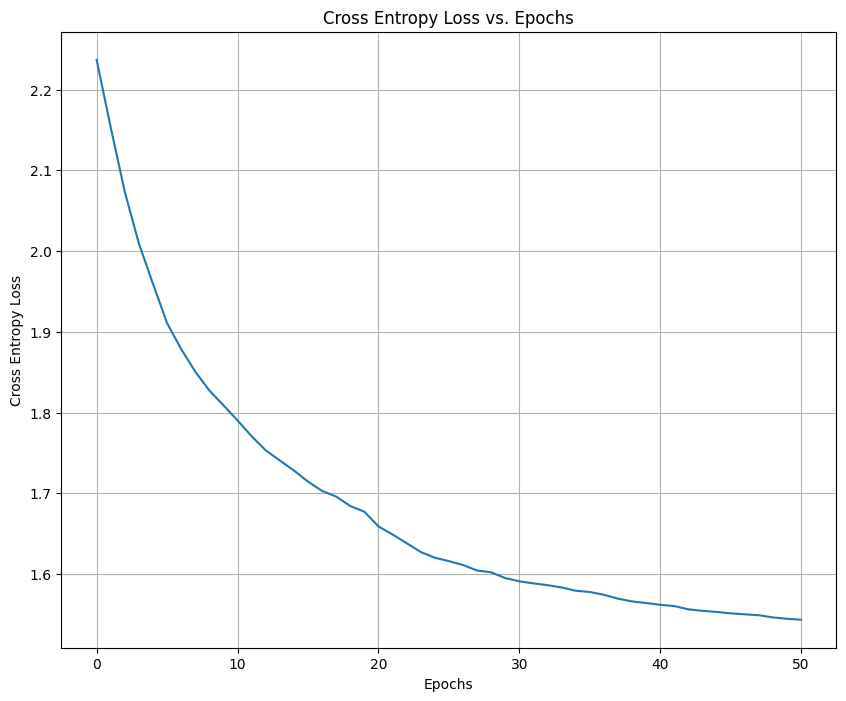

In [55]:
# DO NOT EDIT
np.random.seed(2)
mlp = Network((64,32,64,128,10),(Relu,Relu,Sigmoid,Softmax))
print(mlp.activations)
fit(mlp,X_train,Y_train,CrossEntropy,batch_size=32,learning_rate=5e-4,epochs=50)

In [56]:
#  DO NOT EDIT
y_pred = predict(mlp,X_test)
y_acc = compute_accuracy(y_pred,Y_test)
y_acc

0.9527777777777777